In [2]:
import scripts.data as data

temperature = data.load_temperature_data()
temperature_analysis = temperature.drop(2024, axis=1, inplace=False)

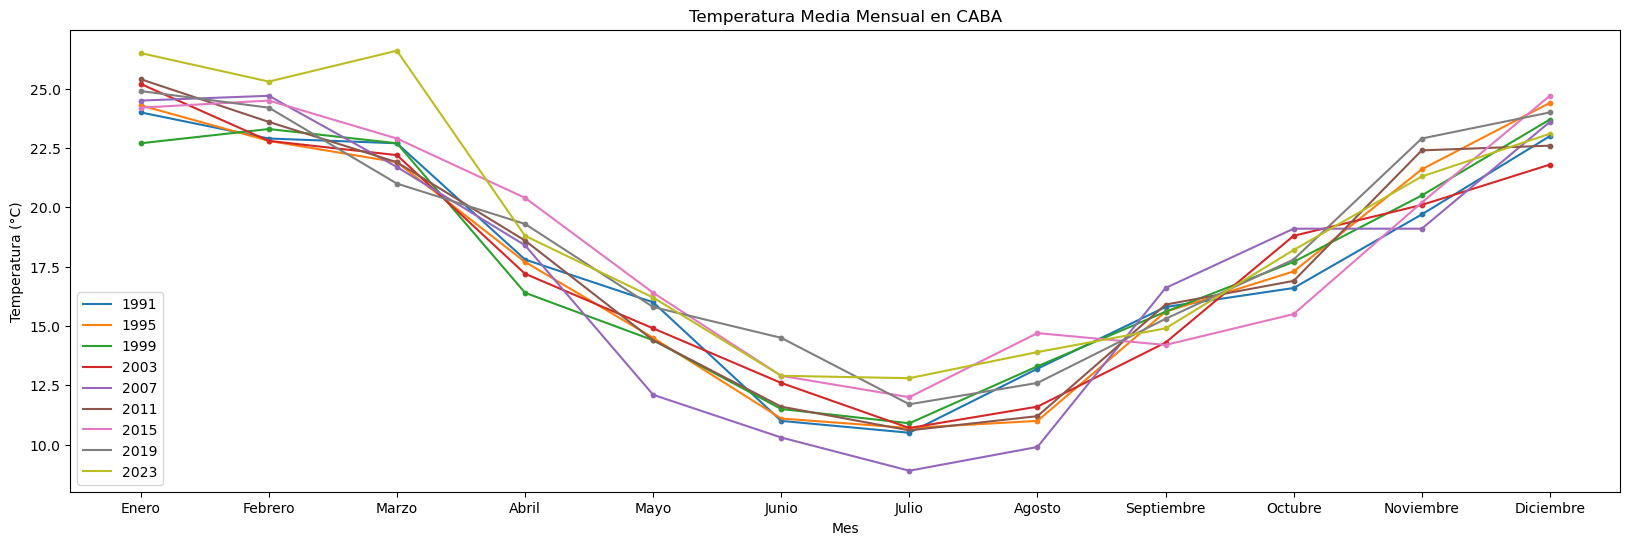

In [3]:
import matplotlib.pyplot as plt

means = temperature_analysis.xs("Mean", level=1, axis=1)

years = means.columns.get_level_values(0).unique().values
month_labels = means.index.values
months = range(1, len(month_labels) + 1)

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)

ax.set_title("Temperatura Media Mensual en CABA")

ax.set_xticks(months)
ax.set_xticklabels(month_labels)

ax.set_ylabel("Temperatura (°C)")
ax.set_xlabel("Mes")

for year in years[::4]:
    ys = means[year].loc[:, "Mean"].values
    ax.plot(months, ys, label=str(year))
    ax.scatter(months, ys, s=10)

ax.legend()
plt.show()

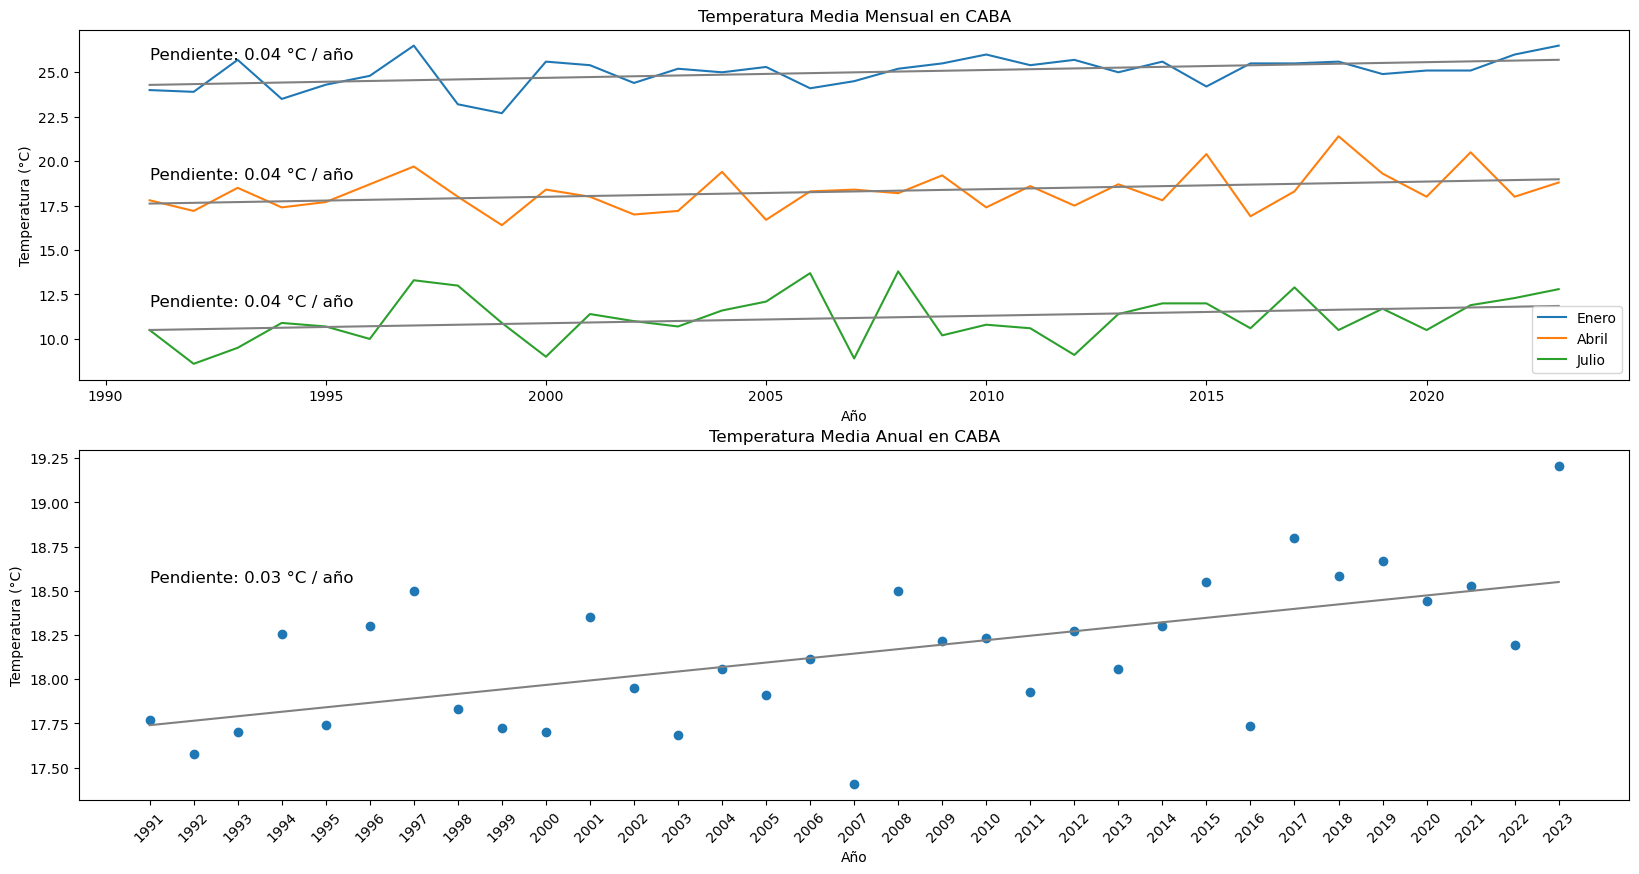

In [4]:
import scripts.plot as plot

mean_temperatures = temperature_analysis.xs("Mean", level=1, axis=1)
years = mean_temperatures.columns.get_level_values(0).unique().values
months = mean_temperatures.index.values

target_months = ["Enero", "Abril", "Julio"]

fig, axis = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

axis[0].set_title("Temperatura Media Mensual en CABA")
axis[0].set_ylabel("Temperatura (°C)")
axis[0].set_xlabel("Año")

for month in target_months:
    temp = mean_temperatures.loc[month, :].loc[:, "Mean"].values
    plot.plot_with_regression(axis[0], years, temp, plot_opts={"label": month})

axis[0].legend()

anual_means = means.mean(axis=0).loc[:, "Mean"]
xs = anual_means.index.values.tolist()
ys = anual_means.values

axis[1].set_title("Temperatura Media Anual en CABA")
axis[1].set_ylabel("Temperatura (°C)")
axis[1].set_xlabel("Año")

plot.plot_with_regression(axis[1], xs, ys, xticklabels=xs, xticks_opts={ "rotation": 45 }, plot="scatter")

plt.show()